## kNN 算法举例 - argsort/scatter/Counter 


In [1]:
from sklearn.neighbors import KNeighborsClassifier


In [2]:
kNN_classifier = KNeighborsClassifier(n_neighbors = 6)

In [3]:
kNN_classifier

KNeighborsClassifier(n_neighbors=6)

In [4]:
kNN_classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [1]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]

In [2]:
raw_data_X

[[3.393533211, 2.331273381],
 [3.110073483, 1.781539638],
 [1.343808831, 3.368360954],
 [3.582294042, 4.67917911],
 [2.280362439, 2.866990263],
 [7.423436942, 4.696522875],
 [5.745051997, 3.533989803],
 [9.172168622, 2.511101045],
 [7.792783481, 3.424088941],
 [7.939820817, 0.791637231]]

In [6]:
raw_data_X

[[3.393533211, 2.331273381],
 [3.110073483, 1.781539638],
 [1.343808831, 3.368360954],
 [3.582294042, 4.67917911],
 [2.280362439, 2.866990263],
 [7.423436942, 4.696522875],
 [5.745051997, 3.533989803],
 [9.172168622, 2.511101045],
 [7.792783481, 3.424088941],
 [7.939820817, 0.791637231]]

In [7]:
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [9]:
import matplotlib.pyplot as plt

In [10]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\junhuawa\\AppData\\Local\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [11]:
import numpy as np
X_train = np.array(raw_data_X)

In [12]:
X_train.shape

(10, 2)

In [13]:
y_train = np.array(raw_data_y)

In [15]:
y_train.shape


(10,)

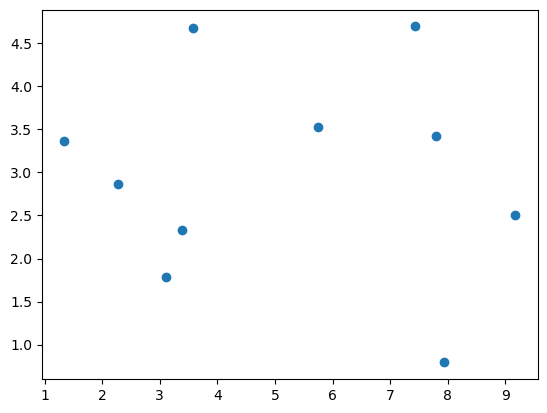

In [20]:
plt.scatter(X_train[:, 0], X_train[:,1])

In [17]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [18]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

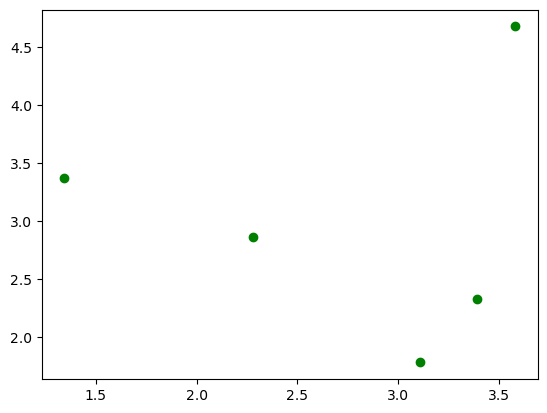

In [25]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0,1], color = 'g')

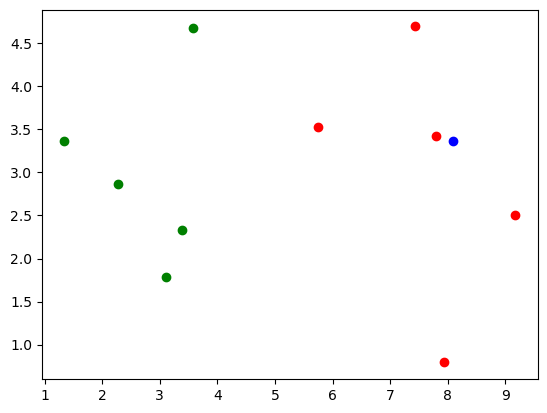

In [28]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0,1], color = 'g')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1,1], color = 'r')
x = np.array([8.093607318, 3.365731514])
plt.scatter(x[0], x[1], color = 'b')

In [31]:
from math import sqrt
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)

In [30]:
d

2.5786840957478887

In [32]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [34]:
from math import sqrt
distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]


In [35]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [36]:
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [37]:
nearest = np.argsort(distances)

In [38]:
k = 6

In [43]:
topK_y = [y_train[i] for i in nearest[: k]]

In [44]:
topK_y

[1, 1, 1, 1, 1, 0]

In [45]:
from collections import Counter

In [48]:
votes = Counter(topK_y)

In [55]:
predict_y = votes.most_common(1)[0][0]

In [56]:
predict_y

1